#### In this analysics i have used the dataset of mysore dist yearly yeild of different crops from villages growen of diiferent taluks and wht are the fertilizers used for good yeild and there weather report 

### here i am importing different libraries for my futher analysics prosess

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS ,ImageColorGenerator
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# reading the my csv file for my futher analysics

In [2]:
s=pd.read_csv(r'updated dataset.csv')
s

Loc ID        taluk            season  Type  EstimatedSalary  \
0    15624510     hd kotte       warm season    19            19000   
1    15810944     hd kotte     winter season    35            20000   
2    15668575     hd kotte     winter season    26            43000   
3    15603246     hd kotte            Kharif    27            57000   
4    15804002     hd kotte        Alalahalli    19            76000   
..        ...          ...               ...   ...              ...   
217  15582066  t-narsipura     Sowing Season    40            78000   
218  15666675  t-narsipura  post,pre-monsoon    46            96000   
219  15732987  t-narsipura       warm season    59           143000   
220  15789432  t-narsipura        All Season    41            80000   
221  15663161  t-narsipura  post,pre-monsoon    35            91000   

         Village         soil        crop  lattitude  longitude  Rainfall  \
0     Alalahalli    clay loam       paddy    12.2352    76.4548    1035.4   
1         Beguru   loamy sand       maize    12.8781    76.6379    1035.4   
2          Golur    clay loam       maize    12.1133    12.1133    1035.4   
3    Honnurkuppe   loamy sand        ragi    11.9977    76.2841    1105.2   
4     Alalahalli   sandy loam         tur    12.9452    77.5443    1105.2   
..           ...          ...         ...        ...        ...       ...   
217       Vatalu  loamy sandy  dry chilly    12.1539    76.8807     886.0   
218    Yadahalli  loamy sandy      ginger    12.3615    76.8865     863.0   
219     Hosakote  loamy sandy      pepper    13.0693    77.7982     757.0   
220      Malangi   sandy loam     coconut    12.2603    76.0943     838.0   
221       Vatalu   sandy loam      cashew    12.1539    76.8807     582.0   

    Humidity  Temperature  Uwater  \
0        55%           29     321   
1        55%           29     197   
2        55%           29     158   
3        55%           26     327   
4        55%           26     174   
..       ...          ...     ...   
217      23%           34     837   
218      23%           34     900   
219      23%           34     681   
220      23%           34     748   
221      23%           34     794   

                                           feritilzers  
0    Urea and slightly moist soil are mixed in the ...  
1    fertilizer required is best calculated by mult...  
2    fertilizer required is best calculated by mult...  
3    40:20:20 NPK kg/ha for short duration varietie...  
4    ARyaLAxmi organic manur and differnt sudcatego...  
..                                                 ...  
217  the NPK value tells you how high the nitrogen ...  
218  low-nitrogen fertilizer on ginger, like a 10-2...  
219  Urea and slightly moist soil are mixed in the ...  
220                                organic manure,salt  
221  N:P:k Ratio of the soil and 250g for super pho...  

[222 rows x 15 columns]

# checking shape of my dataframe

In [3]:
s.shape

(222, 15)

# checking size of my dataframe of my dataframe

In [4]:
s.size

3330

# checking what are the columns in my dataset

In [5]:
s.columns

Index(['Loc ID', 'taluk', 'season', 'Type', 'EstimatedSalary', 'Village',
       'soil', 'crop', 'lattitude', 'longitude', 'Rainfall', 'Humidity',
       'Temperature', 'Uwater', 'feritilzers'],
      dtype='object')

# what are the data types i have in my dataframe

In [6]:
s.dtypes

Loc ID               int64
taluk               object
season              object
Type                 int64
EstimatedSalary      int64
Village             object
soil                object
crop                object
lattitude          float64
longitude          float64
Rainfall           float64
Humidity            object
Temperature          int64
Uwater               int64
feritilzers         object
dtype: object

# to show specific datatypes in my dataframe

In [7]:
s.select_dtypes(include=['number'])

Loc ID  Type  EstimatedSalary  lattitude  longitude  Rainfall  \
0    15624510    19            19000    12.2352    76.4548    1035.4   
1    15810944    35            20000    12.8781    76.6379    1035.4   
2    15668575    26            43000    12.1133    12.1133    1035.4   
3    15603246    27            57000    11.9977    76.2841    1105.2   
4    15804002    19            76000    12.9452    77.5443    1105.2   
..        ...   ...              ...        ...        ...       ...   
217  15582066    40            78000    12.1539    76.8807     886.0   
218  15666675    46            96000    12.3615    76.8865     863.0   
219  15732987    59           143000    13.0693    77.7982     757.0   
220  15789432    41            80000    12.2603    76.0943     838.0   
221  15663161    35            91000    12.1539    76.8807     582.0   

     Temperature  Uwater  
0             29     321  
1             29     197  
2             29     158  
3             26     327  
4             26     174  
..           ...     ...  
217           34     837  
218           34     900  
219           34     681  
220           34     748  
221           34     794  

[222 rows x 8 columns]

# checking  for missing value 

In [8]:
s.isnull().sum()

Loc ID             0
taluk              0
season             0
Type               0
EstimatedSalary    0
Village            0
soil               0
crop               0
lattitude          0
longitude          0
Rainfall           0
Humidity           0
Temperature        0
Uwater             0
feritilzers        0
dtype: int64

# Check for duplicate values

In [9]:
s.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
217    False
218    False
219    False
220    False
221    False
Length: 222, dtype: bool

# descriding my dataframe 

In [10]:
f=s.describe().T
f

count          mean           std           min  \
Loc ID           222.0  1.569148e+07  70688.071838  1.557077e+07   
Type             222.0  3.197748e+01      9.000977  1.800000e+01   
EstimatedSalary  222.0  6.311712e+04  32544.779798  1.500000e+04   
lattitude        222.0  1.249235e+01      0.406587  1.199770e+01   
longitude        222.0  7.392162e+01     12.745730  1.211330e+01   
Rainfall         222.0  8.203225e+02    230.401241  4.500000e+02   
Temperature      222.0  3.222973e+01      3.031721  2.600000e+01   
Uwater           222.0  6.500541e+02    254.132998  1.420000e+02   

                          25%           50%           75%           max  
Loc ID           1.563135e+07  1.569434e+07  1.574635e+07  1.581482e+07  
Type             2.600000e+01  3.050000e+01  3.500000e+01  6.000000e+01  
EstimatedSalary  3.525000e+04  6.050000e+04  8.300000e+04  1.500000e+05  
lattitude        1.219730e+01  1.234860e+01  1.287810e+01  1.353270e+01  
longitude        7.617980e+01  7.645490e+01  7.671570e+01  7.779820e+01  
Rainfall         6.167500e+02  8.140000e+02  1.038850e+03  1.243600e+03  
Temperature      2.900000e+01  3.400000e+01  3.400000e+01  3.400000e+01  
Uwater           3.982500e+02  7.505000e+02  8.290000e+02  9.000000e+02

<AxesSubplot:>

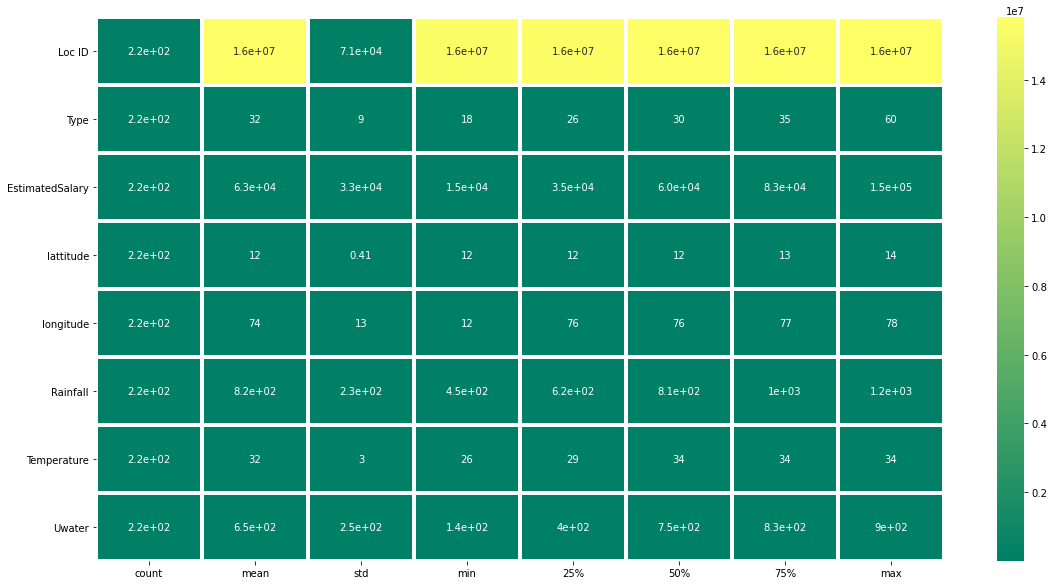

In [11]:
plt.subplots(figsize=(19,10))
sns.heatmap(f,linewidth=3,cmap='summer',annot=True)

# finding the correlation of my dataframe to check the relation of my variables

In [12]:
p=s.corr().T
p

Loc ID      Type  EstimatedSalary  lattitude  longitude  \
Loc ID           1.000000 -0.014571         0.120075   0.040046   0.129312   
Type            -0.014571  1.000000         0.102838   0.037537  -0.047199   
EstimatedSalary  0.120075  0.102838         1.000000   0.103271   0.024457   
lattitude        0.040046  0.037537         0.103271   1.000000   0.190661   
longitude        0.129312 -0.047199         0.024457   0.190661   1.000000   
Rainfall         0.011978  0.042881        -0.169623  -0.119470  -0.267660   
Temperature     -0.035468  0.026887         0.191927   0.119797   0.329685   
Uwater          -0.026475  0.028957         0.188255   0.111173   0.337843   

                 Rainfall  Temperature    Uwater  
Loc ID           0.011978    -0.035468 -0.026475  
Type             0.042881     0.026887  0.028957  
EstimatedSalary -0.169623     0.191927  0.188255  
lattitude       -0.119470     0.119797  0.111173  
longitude       -0.267660     0.329685  0.337843  
Rainfall         1.000000    -0.724778 -0.688729  
Temperature     -0.724778     1.000000  0.951951  
Uwater          -0.688729     0.951951  1.000000

<AxesSubplot:>

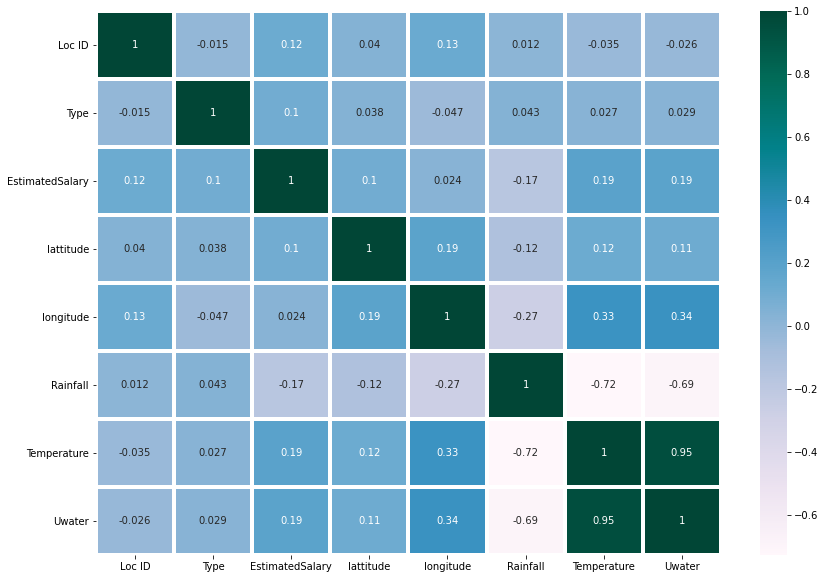

In [13]:
plt.subplots(figsize=(14,10))
sns.heatmap(p,linewidth=3,cmap='PuBuGn',annot=True)

# finding what are the unique variables in taluk

In [14]:
s["taluk"].value_counts()

hd kotte       36
nangangud      34
hunsur         33
mysuru         32
t-narsipura    31
k.r nagar      28
piriyapatna    28
Name: taluk, dtype: int64

# finding what are the unique village i have in my different  taluks

In [15]:
t=s.loc[(s["taluk"]=='hd kotte')]
v1=t.loc[:,"Village"]
s.value_counts(v1)

Village
Honnurkuppe    9
Golur          9
Beguru         9
Alalahalli     9
dtype: int64

In [16]:
t=s.loc[(s["taluk"]=='t-narsipura')]
v1=t.loc[:,"Village"]
s.value_counts(v1)

Village
Vatalu       8
Malangi      8
Hosakote     8
Yadahalli    7
dtype: int64

In [17]:
t=s.loc[(s["taluk"]=='k.r nagar')]
v1=t.loc[:,"Village"]
s.value_counts(v1)

Village
Yedathore        7
Kenchanahalli    7
Hanasoge         7
Bherya           7
dtype: int64

In [18]:
t=s.loc[(s["taluk"]=='nangangud')]
v1=t.loc[:,"Village"]
s.value_counts(v1) 

Village
Varahalli      8
Kappasoge      8
Gonathagala    8
Biligere       8
nangangud      2
dtype: int64

In [19]:
t=s.loc[(s["taluk"]=='mysuru')]
v1=t.loc[:,"Village"]
s.value_counts(v1) 

Village
Yelachahalli    8
Sindhuvalli     8
Kesare          8
Belavadi        8
dtype: int64

In [20]:
t=s.loc[(s["taluk"]=='piriyapatna')]         
v1=t.loc[:,"Village"]
s.value_counts(v1) 

Village
Koppa          7
Kaggundi       7
Hunasekuppe    7
Giragur        7
dtype: int64

In [21]:
t=s.loc[(s["taluk"]=='hunsur')]     
v1=t.loc[:,"Village"]
s.value_counts(v1) 

Village
Kallahallikaval    8
Gohalli            8
Dallalu            8
Chikkadanahalli    8
hunsur             1
dtype: int64

# finding out what are soil available in my district mysore

In [22]:
s["soil"].value_counts()

sandy loam     98
loamy sand     50
clay loam      41
sandy clay     13
loamy sandy    11
caly loam       7
loamy soil      2
Name: soil, dtype: int64

# finding out what are the crops grown in different 

In [23]:
pd.crosstab(s["crop"],s["soil"])

soil           caly loam  clay loam  loamy sand  loamy sandy  loamy soil  \
crop                                                                       
avre                   0          0           7            0           0   
banana                 0          0           7            0           0   
beans                  0          0           0            0           0   
bengal gram            0          7           0            0           0   
black gram             0          0           0            0           0   
brinjal                7          0           0            0           0   
cashew                 0          0           0            0           0   
castor                 0          0           0            0           0   
cluster beans          0          0           0            0           0   
coconut                0          0           0            0           0   
cotton                 0          0           0            0           0   
cowpea                 0          0           0            0           0   
dry chilly             0          0           0            2           0   
ginger                 0          0           0            6           0   
green chill            0          7           5            0           0   
green gram             0          0           0            0           0   
groundnut              0          0           0            0           0   
horse gram             0          7           0            0           0   
jowar                  0          0           0            0           0   
lemon                  0          0           0            0           0   
maize                  0          7           7            0           0   
mango                  0          0           0            0           0   
niger seed             0          0           0            0           2   
onion                  0          0           0            0           0   
paddy                  0          6           0            0           0   
papya                  0          0           0            0           0   
pepper                 0          0           0            3           0   
potato                 0          0           3            0           0   
ragi                   0          0           7            0           0   
sapota                 0          0           0            0           0   
sesamum                0          0           0            0           0   
sugar cane             0          0           7            0           0   
sweet potato           0          0           0            0           0   
tobbaco                0          0           0            0           0   
tomato                 0          0           7            0           0   
tur                    0          7           0            0           0   

soil           sandy clay  sandy loam  
crop                                   
avre                    0           0  
banana                  0           0  
beans                   7           0  
bengal gram             0           0  
black gram              6           0  
brinjal                 0           0  
cashew                  0           4  
castor                  0           7  
cluster beans           0           3  
coconut                 0           7  
cotton                  0           4  
cowpea                  0           7  
dry chilly              0           0  
ginger                  0           0  
green chill             0           0  
green gram              0           6  
groundnut               0           7  
horse gram              0           0  
jowar                   0           4  
lemon                   0           7  
maize                   0           0  
mango                   0           7  
niger seed              0           0  
onion                   0           3  
paddy                   0           0  
papya                   0      

# using pivot table to know count

In [24]:
v1=s.pivot_table('crop',columns='soil',aggfunc='count')
v1

soil  caly loam  clay loam  loamy sand  loamy sandy  loamy soil  sandy clay  \
crop          7         41          50           11           2          13   

soil  sandy loam  
crop          98

# finding out which soil in most available in district mysore

In [25]:
s.soil.max()

'sandy loam'

# finding out which are the places that  sandy soil is available in district mysore

In [26]:
s[s.soil==s.soil.max()]

Loc ID        taluk            season  Type  EstimatedSalary  \
4    15804002     hd kotte        Alalahalli    19            76000   
8    15600575     hd kotte     winter season    25            33000   
10   15570769     hd kotte       Rabi season    26            80000   
12   15746139     hd kotte     Sowing Season    20            86000   
13   15704987     hd kotte       Rabi season    32            18000   
..        ...          ...               ...   ...              ...   
209  15697424  t-narsipura            Summer    46            22000   
210  15724536  t-narsipura     autumn season    48            96000   
216  15636023  t-narsipura            Kharif    49            65000   
220  15789432  t-narsipura        All Season    41            80000   
221  15663161  t-narsipura  post,pre-monsoon    35            91000   

        Village        soil        crop  lattitude  longitude  Rainfall  \
4    Alalahalli  sandy loam         tur    12.9452    77.5443    1105.2   
8    Alalahalli  sandy loam  green gram    12.9452    77.5443     981.9   
10        Golur  sandy loam      cowpea    12.1133    12.1133    1243.6   
12   Alalahalli  sandy loam   groundnut    12.0880    76.3319    1080.5   
13       Beguru  sandy loam      castor    12.9452    77.5443    1080.5   
..          ...         ...         ...        ...        ...       ...   
209      Vatalu  sandy loam      sapota    12.1539    76.8807     643.0   
210   Yadahalli  sandy loam       papya    12.3615    76.8865     491.0   
216     Malangi  sandy loam       onion    12.2603    76.0943     815.0   
220     Malangi  sandy loam     coconut    12.2603    76.0943     838.0   
221      Vatalu  sandy loam      cashew    12.1539    76.8807     582.0   

    Humidity  Temperature  Uwater  \
4        55%           26     174   
8        55%           27     194   
10       55%           28     193   
12       55%           27     326   
13       55%           27     194   
..       ...          ...     ...   
209      23%           34     789   
210      23%           34     843   
216      23%           34     851   
220      23%           34     748   
221      23%           34     794   

                                           feritilzers  
4    ARyaLAxmi organic manur and differnt sudcatego...  
8    seed treatment with biofertilizer viz. Rhizobi...  
10   Field Yard Manure is used in the main fields a...  
12   10-25kg nitrogen (N), 20-40kg phosphorus (P 2 ...  
13                               P:K AS 40:40:20 KG/HA  
..                                                 ...  
209  natural manur  you don’t have to provide addit...  
210    natural manur and nitrogen and k anf yeild yard  
216  depends on the ph level of the soil and sub nu...  
220                                organic manure,salt  
221  N:P:k Ratio of the soil and 250g for super pho...  

[98 rows x 15 columns]

# viewing the soil location using map in mysore disct`1`

In [27]:
fig = px.scatter_geo(s,lat='lattitude',lon='longitude',color="soil")
                       
fig.update_layout(title = 'SOIL PERSENT IN DISTRICT MYSORE ', title_x=0.5)
fig.show()

# finding wich taluk sandy soil is found more in mysore

In [28]:
m=s[s.soil==s.soil.max()]
m.taluk.max()

't-narsipura'

# finding wich crop is grew more sandy soil is found more in mysore

In [29]:
m=s[s.soil==s.soil.max()]
m.crop.max()


'tur'

# finding wich crop is grew less sandy soil is found more in mysore

In [30]:
m=s[s.soil==s.soil.max()]
m.crop.min()

'cashew'

# finding which taluk ,crop have higest estimated salary

In [31]:
s[s.EstimatedSalary==s.EstimatedSalary.max()]

Loc ID        taluk         season  Type  EstimatedSalary      Village  \
7    15694829     hd kotte  Sowing Season    32           150000  Honnurkuppe   
211  15735878  t-narsipura  autumn season    52           150000     Hosakote   

           soil        crop  lattitude  longitude  Rainfall Humidity  \
7    sandy clay  black gram    11.9977    76.2841     981.9      55%   
211  loamy sand      potato    13.0693    77.7982     488.0      23%   

     Temperature  Uwater                                        feritilzers  
7             27     186  20 kg N\t44 kg Urea\tBasal application at the ...  
211           34     821    natural manur and nitrogen and k and yeild yard

In [32]:
i=s[s.EstimatedSalary==s.EstimatedSalary.max()]
i.taluk.max()

't-narsipura'

In [33]:
i=s[s.EstimatedSalary==s.EstimatedSalary.max()]
i.crop.max()

'potato'

# finding out which are taluk grow potato

In [34]:
t=s.loc[(s["crop"]=='potato')]
t

Loc ID        taluk         season  Type  EstimatedSalary      Village  \
23   15599081     hd kotte  autumn season    45            22000  Honnurkuppe   
182  15694288  piriyapatna  autumn season    32           117000        Koppa   
211  15735878  t-narsipura  autumn season    52           150000     Hosakote   

           soil    crop  lattitude  longitude  Rainfall Humidity  Temperature  \
23   loamy sand  potato    12.1133    12.1133    1179.3      55%           27   
182  loamy sand  potato    13.5327    75.3558     600.0      23%           34   
211  loamy sand  potato    13.0693    77.7982     488.0      23%           34   

     Uwater                                      feritilzers  
23      156  natural manur and nitrogen and k and yeild yard  
182     885  natural manur and nitrogen and k and yeild yard  
211     821  natural manur and nitrogen and k and yeild yard

#### in the above we can check that potato are grow in different taluk but all did not sold for more price because of proper usage of feritilzers and requried amount of rain only give good yeild

# in the below graph its is showed what are the proper feritilzers used in cultivating of potato crop

In [35]:
t=s.feritilzers[211]
w=WordCloud().generate(t)

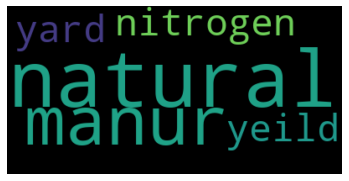

In [36]:
plt.imshow(w,interpolation='bilinear')
plt.axis("off")
plt.show()

In [37]:
s[s.Temperature>=30]

Loc ID        taluk            season  Type  EstimatedSalary  \
57   15807481       hunsur            Summer    28            79000   
58   15642885       hunsur     autumn season    22            18000   
59   15789109       hunsur            Summer    32           117000   
60   15814004       hunsur       warm season    27            20000   
61   15673619       hunsur              Rabi    25            87000   
..        ...          ...               ...   ...              ...   
217  15582066  t-narsipura     Sowing Season    40            78000   
218  15666675  t-narsipura  post,pre-monsoon    46            96000   
219  15732987  t-narsipura       warm season    59           143000   
220  15789432  t-narsipura        All Season    41            80000   
221  15663161  t-narsipura  post,pre-monsoon    35            91000   

             Village         soil        crop  lattitude  longitude  Rainfall  \
57   Chikkadanahalli   sandy loam      sapota    12.3493    76.5046    1087.0   
58           Gohalli   sandy loam       papya    12.2605    76.4303    1031.0   
59   Kallahallikaval   loamy sand      tomato    12.3027    76.2208     952.0   
60           Dallalu    caly loam     brinjal    12.3091    76.2833     662.0   
61   Chikkadanahalli   sandy clay       beans    12.3493    76.5046     739.0   
..               ...          ...         ...        ...        ...       ...   
217           Vatalu  loamy sandy  dry chilly    12.1539    76.8807     886.0   
218        Yadahalli  loamy sandy      ginger    12.3615    76.8865     863.0   
219         Hosakote  loamy sandy      pepper    13.0693    77.7982     757.0   
220          Malangi   sandy loam     coconut    12.2603    76.0943     838.0   
221           Vatalu   sandy loam      cashew    12.1539    76.8807     582.0   

    Humidity  Temperature  Uwater  \
57       23%           34     872   
58       23%           34     829   
59       23%           34     797   
60       23%           34     799   
61       23%           34     694   
..       ...          ...     ...   
217      23%           34     837   
218      23%           34     900   
219      23%           34     681   
220      23%           34     748   
221      23%           34     794   

                                           feritilzers  
57   natural manur  you don’t have to provide addit...  
58     natural manur and nitrogen and k anf yeild yard  
59      BR-earth and vigro burpee and feild yard manur  
60   Seed treatment,\nUREA\tSSP \tMURIATE OF POTASH...  
61   Apply farm yard manure 25 tons/ha,each of npk ...  
..                                                 ...  
217  the NPK value tells you how high the nitrogen ...  
218  low-nitrogen fertilizer on ginger, like a 10-2...  
219  Urea and slightly moist soil are mixed in the ...  
220                                organic manure,salt  
221  N:P:k Ratio of the soil and 250g for super pho...  

[165 rows x 15 columns]

# group by

In [38]:
taluk_crop=s.groupby('taluk').crop.describe()
taluk_crop

count unique          top freq
taluk                                     
hd kotte       36     33  green chill    2
hunsur         33     30        maize    2
k.r nagar      28     26        maize    2
mysuru         32     29        maize    2
nangangud      34     31          tur    2
piriyapatna    28     25        maize    2
t-narsipura    31     29        maize    2

In [39]:
humidity=s.groupby('taluk').Humidity.describe()
humidity

count unique  top freq
taluk                             
hd kotte       36      1  55%   36
hunsur         33      2  55%   21
k.r nagar      28      1  23%   28
mysuru         32      1  23%   32
nangangud      34      1  23%   34
piriyapatna    28      1  23%   28
t-narsipura    31      1  23%   31

# finding out where the highest rainfall happend in mysore dist

In [40]:
s[s.Rainfall==s.Rainfall.max()]

Loc ID     taluk         season  Type  EstimatedSalary      Village  \
9   15727311  hd kotte  winter season    35            65000       Beguru   
10  15570769  hd kotte    Rabi season    26            80000        Golur   
11  15606274  hd kotte  winter season    26            52000  Honnurkuppe   

          soil         crop  lattitude  longitude  Rainfall Humidity  \
9   loamy sand         avre    12.8781    76.6379    1243.6      55%   
10  sandy loam       cowpea    12.1133    12.1133    1243.6      55%   
11   clay loam  bengal gram    11.9977    76.2841    1243.6      55%   

    Temperature  Uwater                                        feritilzers  
9            28     321    BIO-K-RICH,BORON PLUS-20,YARAVERA,P-10-K-20-N98  
10           28     193  Field Yard Manure is used in the main fields a...  
11           28     143  not have moisture exceeding 12% and swabhiman3...

# finding minimum and avg rainfall happed in dist by using descide table

In [41]:
rain=s.groupby('taluk').Rainfall.describe()
rain

count         mean         std    min       25%      50%  \
taluk                                                                   
hd kotte      36.0  1116.608333   89.275440  953.7  1069.225  1117.15   
hunsur        33.0   947.203030  230.658762  455.0   739.000  1045.20   
k.r nagar     28.0   723.285714  167.962045  463.0   580.500   690.50   
mysuru        32.0   712.187500  185.890088  450.0   574.750   670.00   
nangangud     34.0   725.705882  160.175761  462.0   607.750   692.00   
piriyapatna   28.0   729.428571  188.260345  490.0   601.500   675.50   
t-narsipura   31.0   726.322581  180.256925  450.0   596.000   690.00   

                 75%     max  
taluk                         
hd kotte     1186.55  1243.6  
hunsur       1116.30  1215.5  
k.r nagar     859.75  1081.0  
mysuru        826.25  1077.0  
nangangud     846.75  1097.0  
piriyapatna   824.75  1136.0  
t-narsipura   832.00  1184.0

<AxesSubplot:ylabel='taluk'>

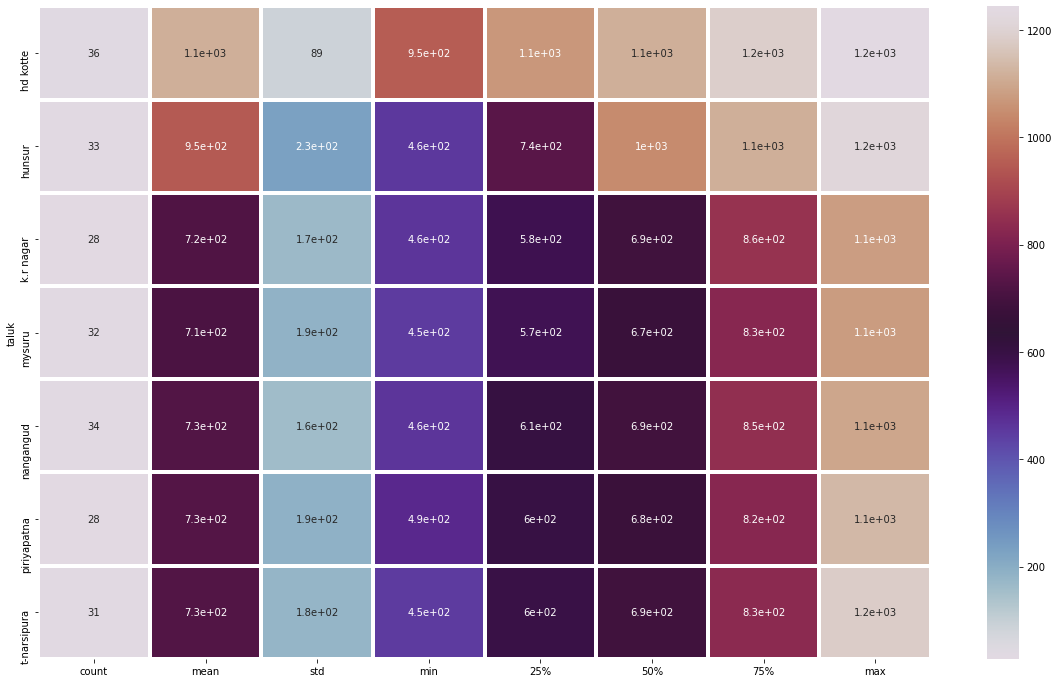

In [42]:
plt.subplots(figsize=(20,12))
sns.heatmap(rain,linewidth=3,cmap='twilight',annot=True)

# checking out the humidity of different tali=uk in dist

In [43]:
pd.crosstab(s["Humidity"],s["taluk"])

taluk     hd kotte  hunsur  k.r nagar  mysuru  nangangud  piriyapatna  \
Humidity                                                                
23%              0      12         28      32         34           28   
55%             36      21          0       0          0            0   

taluk     t-narsipura  
Humidity               
23%                31  
55%                 0

<AxesSubplot:xlabel='Rainfall', ylabel='Humidity'>

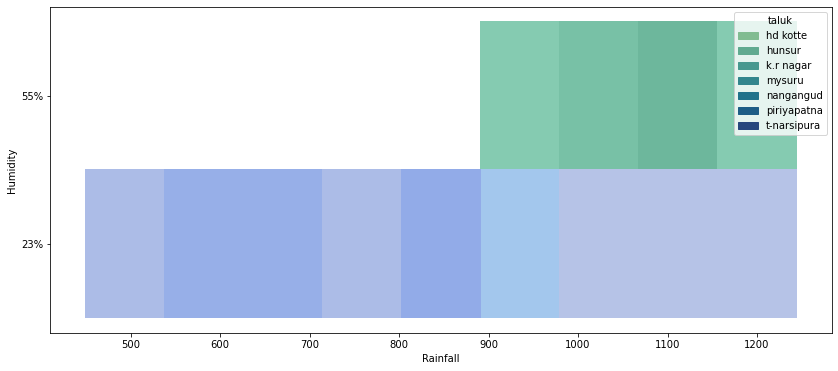

In [44]:
plt.figure(figsize=(14,6))
sns.histplot(s, x="Rainfall", y="Humidity",hue="taluk", multiple="dodge", palette="crest",shrink=.8)

### finding to what are the yearly profit i get in different taluks

In [45]:
profits= s.groupby(['taluk']) .agg({"EstimatedSalary" : 'sum'}).round(decimals = 2)
profits

EstimatedSalary
taluk                       
hd kotte             1795000
hunsur               1987000
k.r nagar            1726000
mysuru               2139000
nangangud            2165000
piriyapatna          1788000
t-narsipura          2412000

In [46]:
max_profits= s.groupby(['taluk']) .agg({"EstimatedSalary" : 'sum'}).max().round(decimals = 2)
max_profits

EstimatedSalary    2412000
dtype: int64

In [47]:
min_profits= s.groupby(['taluk']) .agg({"EstimatedSalary" : 'sum'}).min().round(decimals = 2)
min_profits

EstimatedSalary    1726000
dtype: int64

## finding out the what is the under water status of my dist 

In [48]:
wl=s["Uwater"].value_counts()
wl

841    4
829    4
174    4
398    3
748    3
      ..
173    1
178    1
179    1
835    1
769    1
Name: Uwater, Length: 151, dtype: int64

In [49]:
s[s.Uwater==s.Uwater.max()]

Loc ID        taluk            season  Type  EstimatedSalary  \
218  15666675  t-narsipura  post,pre-monsoon    46            96000   

       Village         soil    crop  lattitude  longitude  Rainfall Humidity  \
218  Yadahalli  loamy sandy  ginger    12.3615    76.8865     863.0      23%   

     Temperature  Uwater                                        feritilzers  
218           34     900  low-nitrogen fertilizer on ginger, like a 10-2...

In [50]:
i=s[s.Uwater==s.Uwater.max()]
i.taluk.max()

't-narsipura'

In [51]:
i=s[s.Uwater==s.Uwater.max()]
i.Village.max()

'Yadahalli'

In [52]:
i=s[s.Uwater==s.Uwater.max()]
i.soil.max()

'loamy sandy'

In [53]:
wl= s.groupby(['soil']) .agg({"Uwater" : 'sum'}).round(decimals = 2)
wl

Uwater
soil               
caly loam      4962
clay loam     27285
loamy sand    32767
loamy sandy    7839
loamy soil      837
sandy clay     8635
sandy loam    61987

In [54]:
fig = px.scatter_geo(s,lat='lattitude',lon='longitude',color="taluk",size='Uwater')
                       
fig.update_layout(title = 'SOIL PERSENT IN DISTRICT MYSORE ', title_x=0.5)
fig.show()

##### imported squarify library for ploting square chart

In [55]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [56]:
import squarify

# taluk wise estimatedsalary

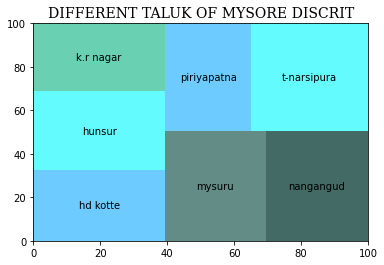

In [57]:
profits= s.groupby(['taluk']) .agg({"EstimatedSalary" : 'sum'}).round(decimals = 2)
profits
col = ("#48beff","#3dfaff","#43c59e","#3d7068","#14453d")
squarify.plot(sizes=profits['EstimatedSalary'], label=profits.index, alpha=0.8, color = col )
font1 = {'family' : 'serif' , 'color' :'k' , 'size' : 14}
plt.title("DIFFERENT TALUK OF MYSORE DISCRIT" , font1);
plt.show()

#### village  wise estimatedsalary

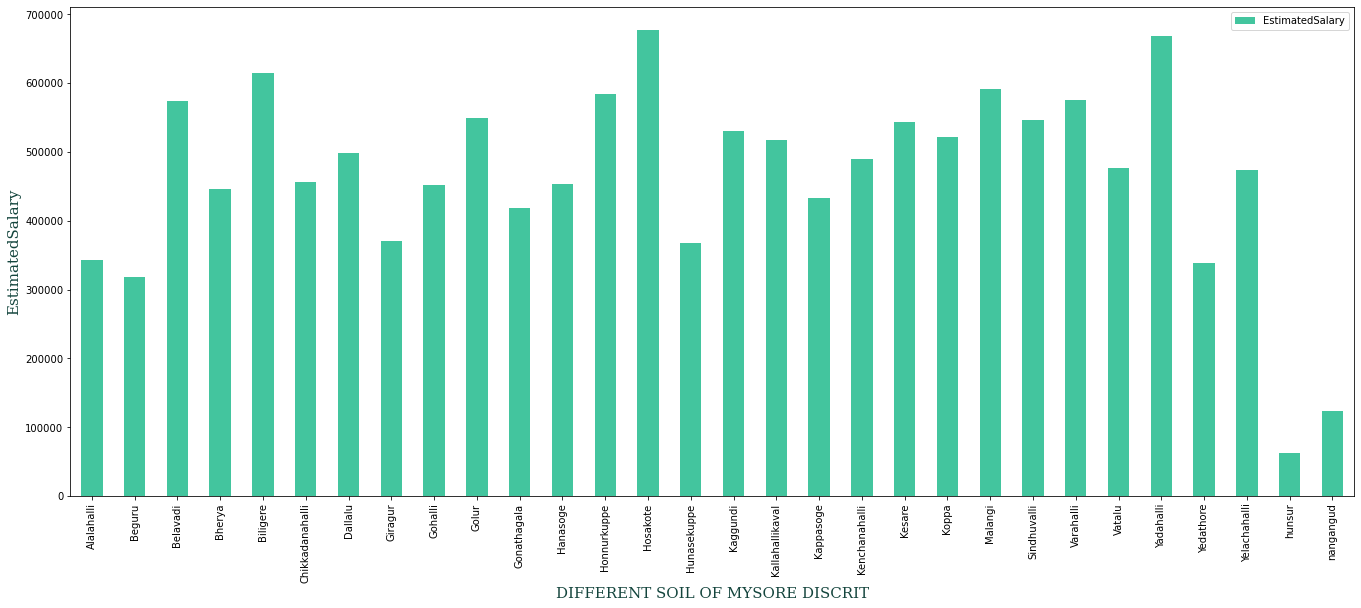

In [58]:
profits1 = s.groupby(['Village']).agg({"EstimatedSalary" : 'sum'}).round(decimals = 2)
font1 = {'family' : 'serif' , 'color' :'#14453d' , 'size' : 15}
profits1.plot(kind='bar', figsize=(23,9), color="#43c59e")
plt.xlabel("DIFFERENT SOIL OF MYSORE DISCRIT" , font1);
plt.ylabel("EstimatedSalary" , font1);

#### the crops gropu in hosakote village

#### in the above graph hoskote i have seen the higst estimated salary in hosakote in futher you see details

In [59]:
t=s.loc[(s["Village"]=='Hosakote')]
v1=t.loc[:,"crop"]
s.value_counts(v1) 

crop
maize          2
potato         1
pepper         1
mango          1
green chill    1
black gram     1
bengal gram    1
dtype: int64

#### crop wise estimatedsalary

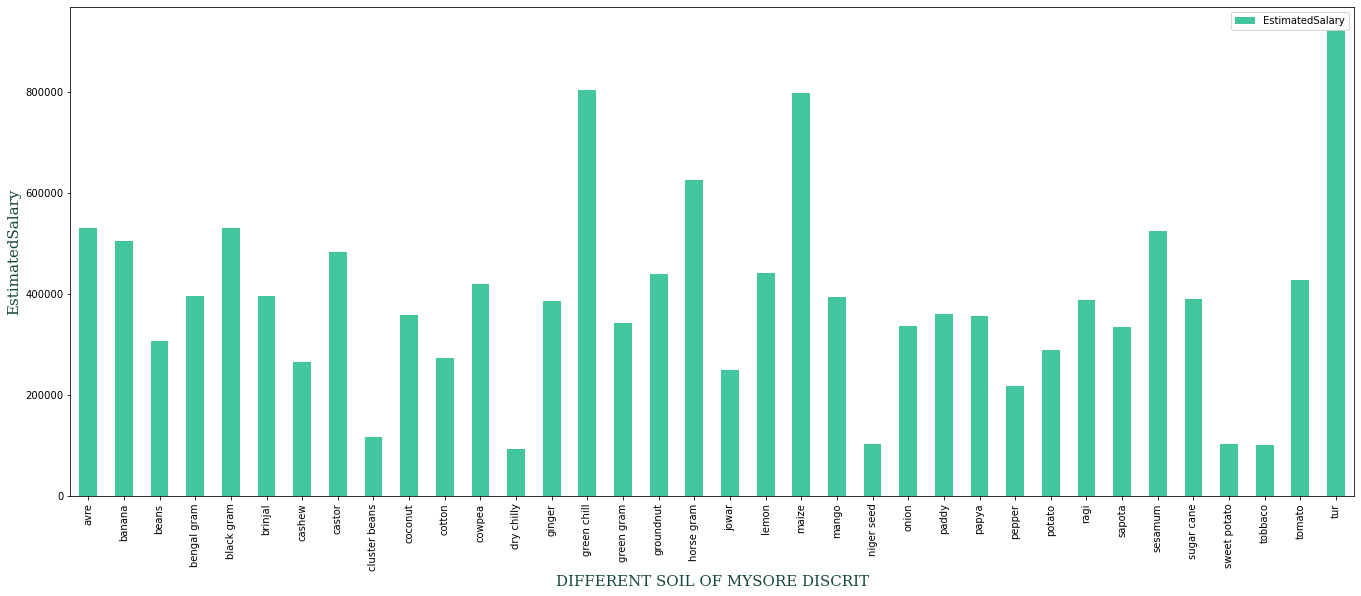

In [60]:
profits1 = s.groupby(['crop']) .agg({"EstimatedSalary" : 'sum'}).round(decimals = 2)
font1 = {'family' : 'serif' , 'color' :'#14453d' , 'size' : 15}
profits1.plot(kind='bar', figsize=(23,9), color="#43c59e",)
plt.xlabel("DIFFERENT SOIL OF MYSORE DISCRIT" , font1);
plt.ylabel("EstimatedSalary" , font1);

#### soil wise estimatedsalary

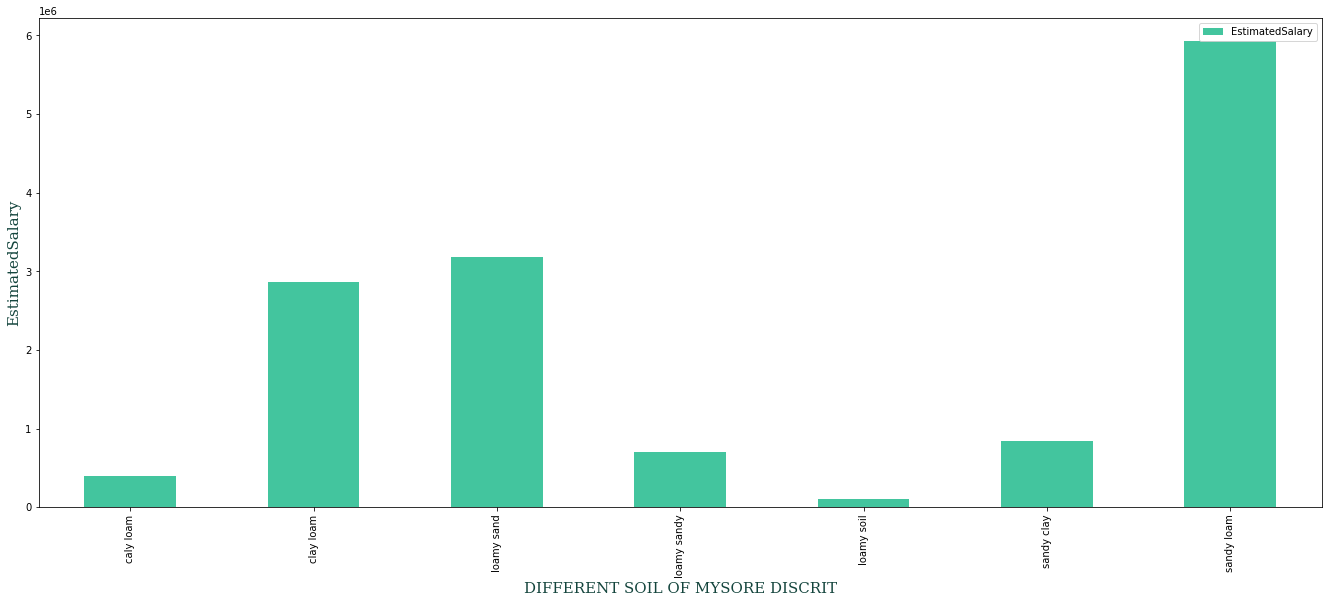

In [61]:
profits1 = s.groupby(['soil']).agg({"EstimatedSalary" : 'sum'}).round(decimals = 2)
font1 = {'family' : 'serif' , 'color' :'#14453d' , 'size' : 15}
profits1.plot(kind='bar', figsize=(23,9), color="#43c59e")
plt.xlabel("DIFFERENT SOIL OF MYSORE DISCRIT" , font1);
plt.ylabel("EstimatedSalary" , font1);

# in the above chart EstimatedSalary for soil wise i have higest sandy because in have higest sandy soil in dist

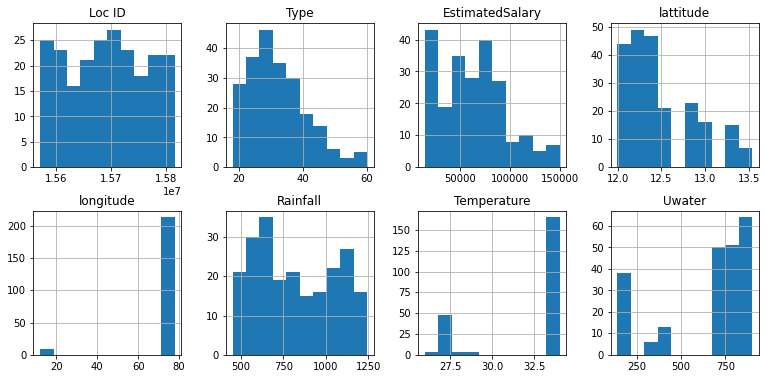

In [62]:
s.hist(figsize=(13,13),layout=(4,4),sharex=False);

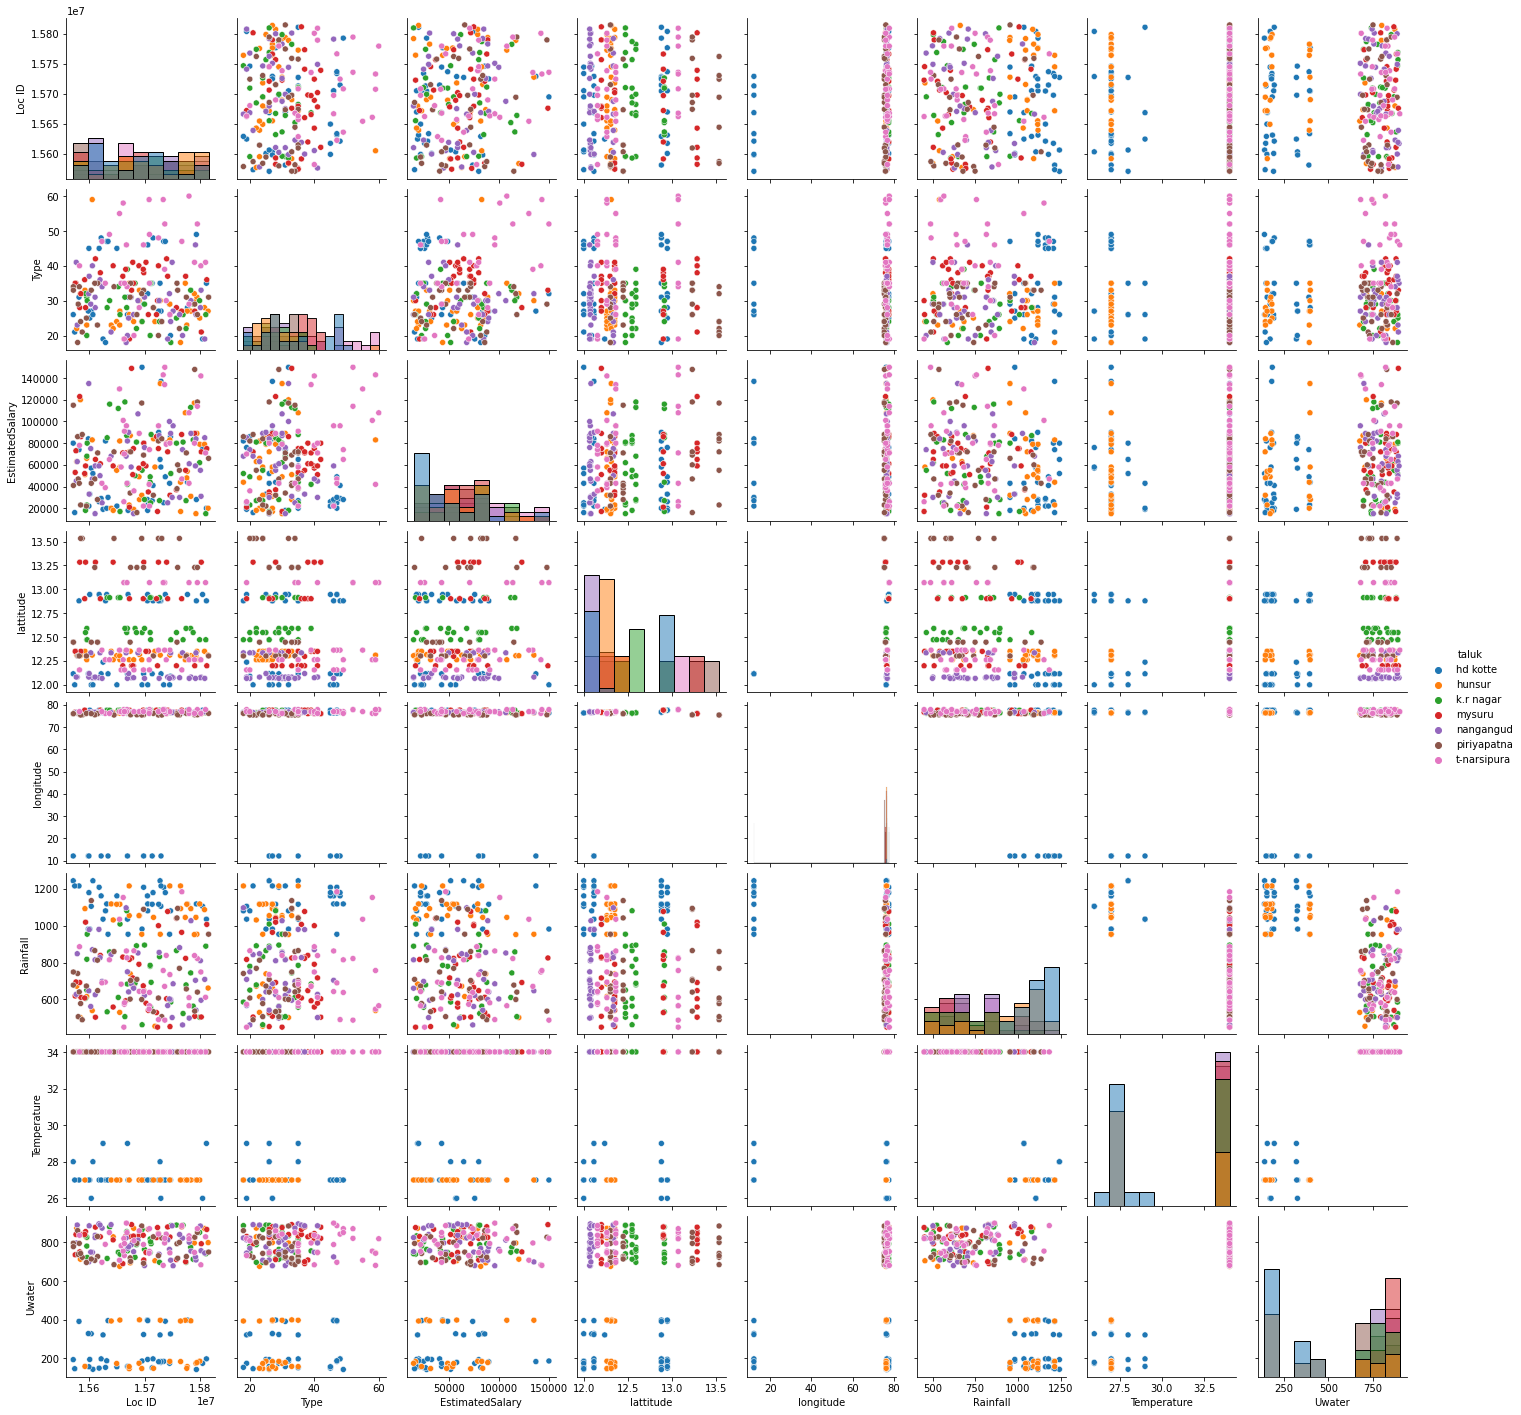

In [63]:
sns.pairplot(s, hue="taluk",diag_kind="hist")

#### in the above analysis i ahve observed that in the highest soil present in the mysore dist is sanday soil and higest crop grown in sanday and potato is the higest profits got in the dist and also observed that potato is growen in differrent taluk only few have got profit because of not good harvesting method and rainfall also depends on the good yeild and proper usage of fertilizer  should br used